### Myworkshop : Iris MLP Classification 
    - ตรวจสอบข้อมูลสูญหาย (Missing Values)
    - เข้ารหัส Label Encoding เปลี่ยน Label ให้เป็นตัวเลข
    - ปรับสเกลข้อมูล (Feature scaling)
    - Train & Evaluate
    - prediction

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Dataset

In [2]:
df = sns.load_dataset('iris')
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
53,5.5,2.3,4.0,1.3,versicolor
60,5.0,2.0,3.5,1.0,versicolor
9,4.9,3.1,1.5,0.1,setosa
126,6.2,2.8,4.8,1.8,virginica
37,4.9,3.6,1.4,0.1,setosa
67,5.8,2.7,4.1,1.0,versicolor
112,6.8,3.0,5.5,2.1,virginica
127,6.1,3.0,4.9,1.8,virginica
99,5.7,2.8,4.1,1.3,versicolor
119,6.0,2.2,5.0,1.5,virginica


In [3]:
pd.unique(df.species)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
X = df.drop(['species'], axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
y = df.species
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

### Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
pd.unique(y)

array([0, 1, 2])

### Data Visualization

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

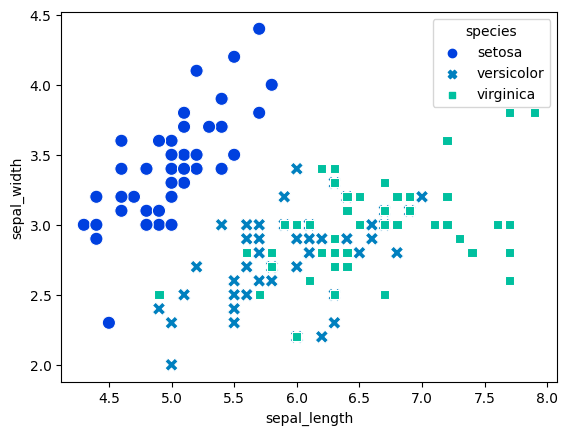

In [8]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=df, hue='species', style='species', palette='winter', s=90)

In [9]:
# sns.pairplot(df, hue='species')
# plt.show()

### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_sc = sc.fit_transform(X)
X_sc[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

### Train-Test-Split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1)

In [12]:
print(len(X_train))
print(len(X_test))

112
38


### Model and Train

In [13]:
from sklearn.neural_network import MLPClassifier

hidden=1000
iter=1000

model = MLPClassifier(hidden_layer_sizes=(hidden), max_iter=100, random_state=20, verbose=True)

In [14]:
model.fit(X_train, y_train)

Iteration 1, loss = 1.12165901
Iteration 2, loss = 1.04839327
Iteration 3, loss = 0.97981339
Iteration 4, loss = 0.91598551
Iteration 5, loss = 0.85701104
Iteration 6, loss = 0.80269529
Iteration 7, loss = 0.75292456
Iteration 8, loss = 0.70754260
Iteration 9, loss = 0.66635896
Iteration 10, loss = 0.62910823
Iteration 11, loss = 0.59546987
Iteration 12, loss = 0.56513652
Iteration 13, loss = 0.53777717
Iteration 14, loss = 0.51308018
Iteration 15, loss = 0.49076901
Iteration 16, loss = 0.47055978
Iteration 17, loss = 0.45221284
Iteration 18, loss = 0.43548755
Iteration 19, loss = 0.42015837
Iteration 20, loss = 0.40607820
Iteration 21, loss = 0.39308029
Iteration 22, loss = 0.38102822
Iteration 23, loss = 0.36981082
Iteration 24, loss = 0.35933042
Iteration 25, loss = 0.34950574
Iteration 26, loss = 0.34027151
Iteration 27, loss = 0.33156682
Iteration 28, loss = 0.32334283
Iteration 29, loss = 0.31553608
Iteration 30, loss = 0.30811445
Iteration 31, loss = 0.30103428
Iteration 32, los

c:\Users\Windows 10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=1000, max_iter=100, random_state=20,
              verbose=True)

### Predict

In [15]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
127,6.1,3.0,4.9,1.8,virginica
29,4.7,3.2,1.6,0.2,setosa
139,6.9,3.1,5.4,2.1,virginica
68,6.2,2.2,4.5,1.5,versicolor
13,4.3,3.0,1.1,0.1,setosa


In [16]:
X_input = [[5.1, 3.5, 1.4, 0.2], #setosa
           [6.1, 3.0, 4.9, 1.8], #virginaca
           [6.2, 2.2, 4.5, 1.5]] #virsicolor

In [17]:
X_input = sc.transform(X_input)
X_input

c:\Users\Windows 10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [ 0.31099753, -0.13197948,  0.64908342,  0.79067065],
       [ 0.4321654 , -1.97355361,  0.42173371,  0.3957741 ]])

In [18]:
y_pred = model.predict(X_input)
y_pred

array([0, 2, 1])

In [19]:
class_name = ['setosa', 'versicolor', 'virginica']

In [20]:
for i, y in enumerate(y_pred):
    print(f"Input{i} : {class_name[y]}")

Input0 : setosa
Input1 : virginica
Input2 : versicolor


### Evaluation

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = model.predict(X_test)

print('Score -> {:.4f}' .format(model.score(X_test, y_test)))
print(classification_report(y_test, y_predict, target_names=class_name))
print(confusion_matrix(y_test, y_predict))

Score -> 0.9737
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


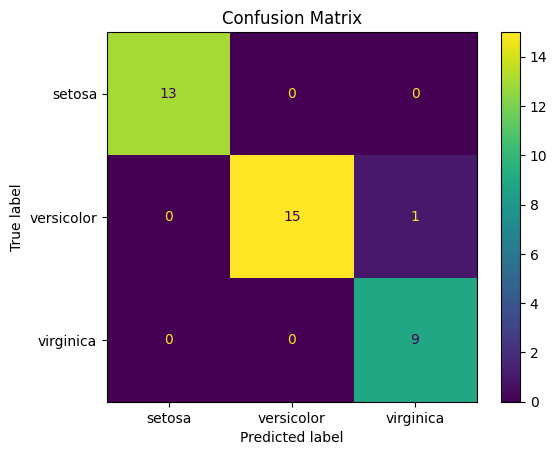

In [22]:
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predict)
ConfusionMatrixDisplay(cm, display_labels=class_name).plot()
plt.title('Confusion Matrix')
plt.show()

### Loss Curve

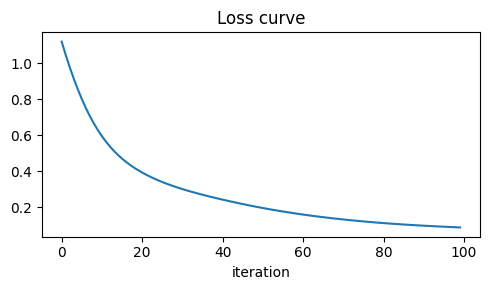

In [23]:
plt.figure(figsize=(5,3))
plt.title('Loss curve')
plt.xlabel('iteration')
plt.plot(model.loss_curve_)
plt.tight_layout()
plt.show()

### Decision Region

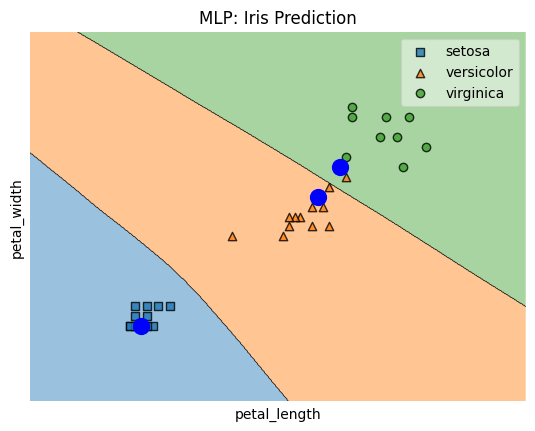

In [24]:
from mlxtend.plotting import plot_decision_regions

value = 0
width = 9.5

ax = plot_decision_regions(X_test, np.array(y_test), clf=model, feature_index=[2,3], # feature ที่ 2 กับ 3 ดีสุด เพราะไม่เกยกัน
    filler_feature_values={0: value, 1: value},
    filler_feature_ranges={0: width, 1: width},
    legend=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_name, framealpha=0.5)

plt.title('MLP: Iris Prediction')

plt.xticks([])
plt.yticks([])
plt.xlabel('petal_length')
plt.ylabel('petal_width')

plt.scatter(X_input[:,2], X_input[:,3], marker='o', s=130, c='b')
plt.show()